In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [3]:
combo_df = pd.read_csv("ts_tsne_plot_data.csv.gz")

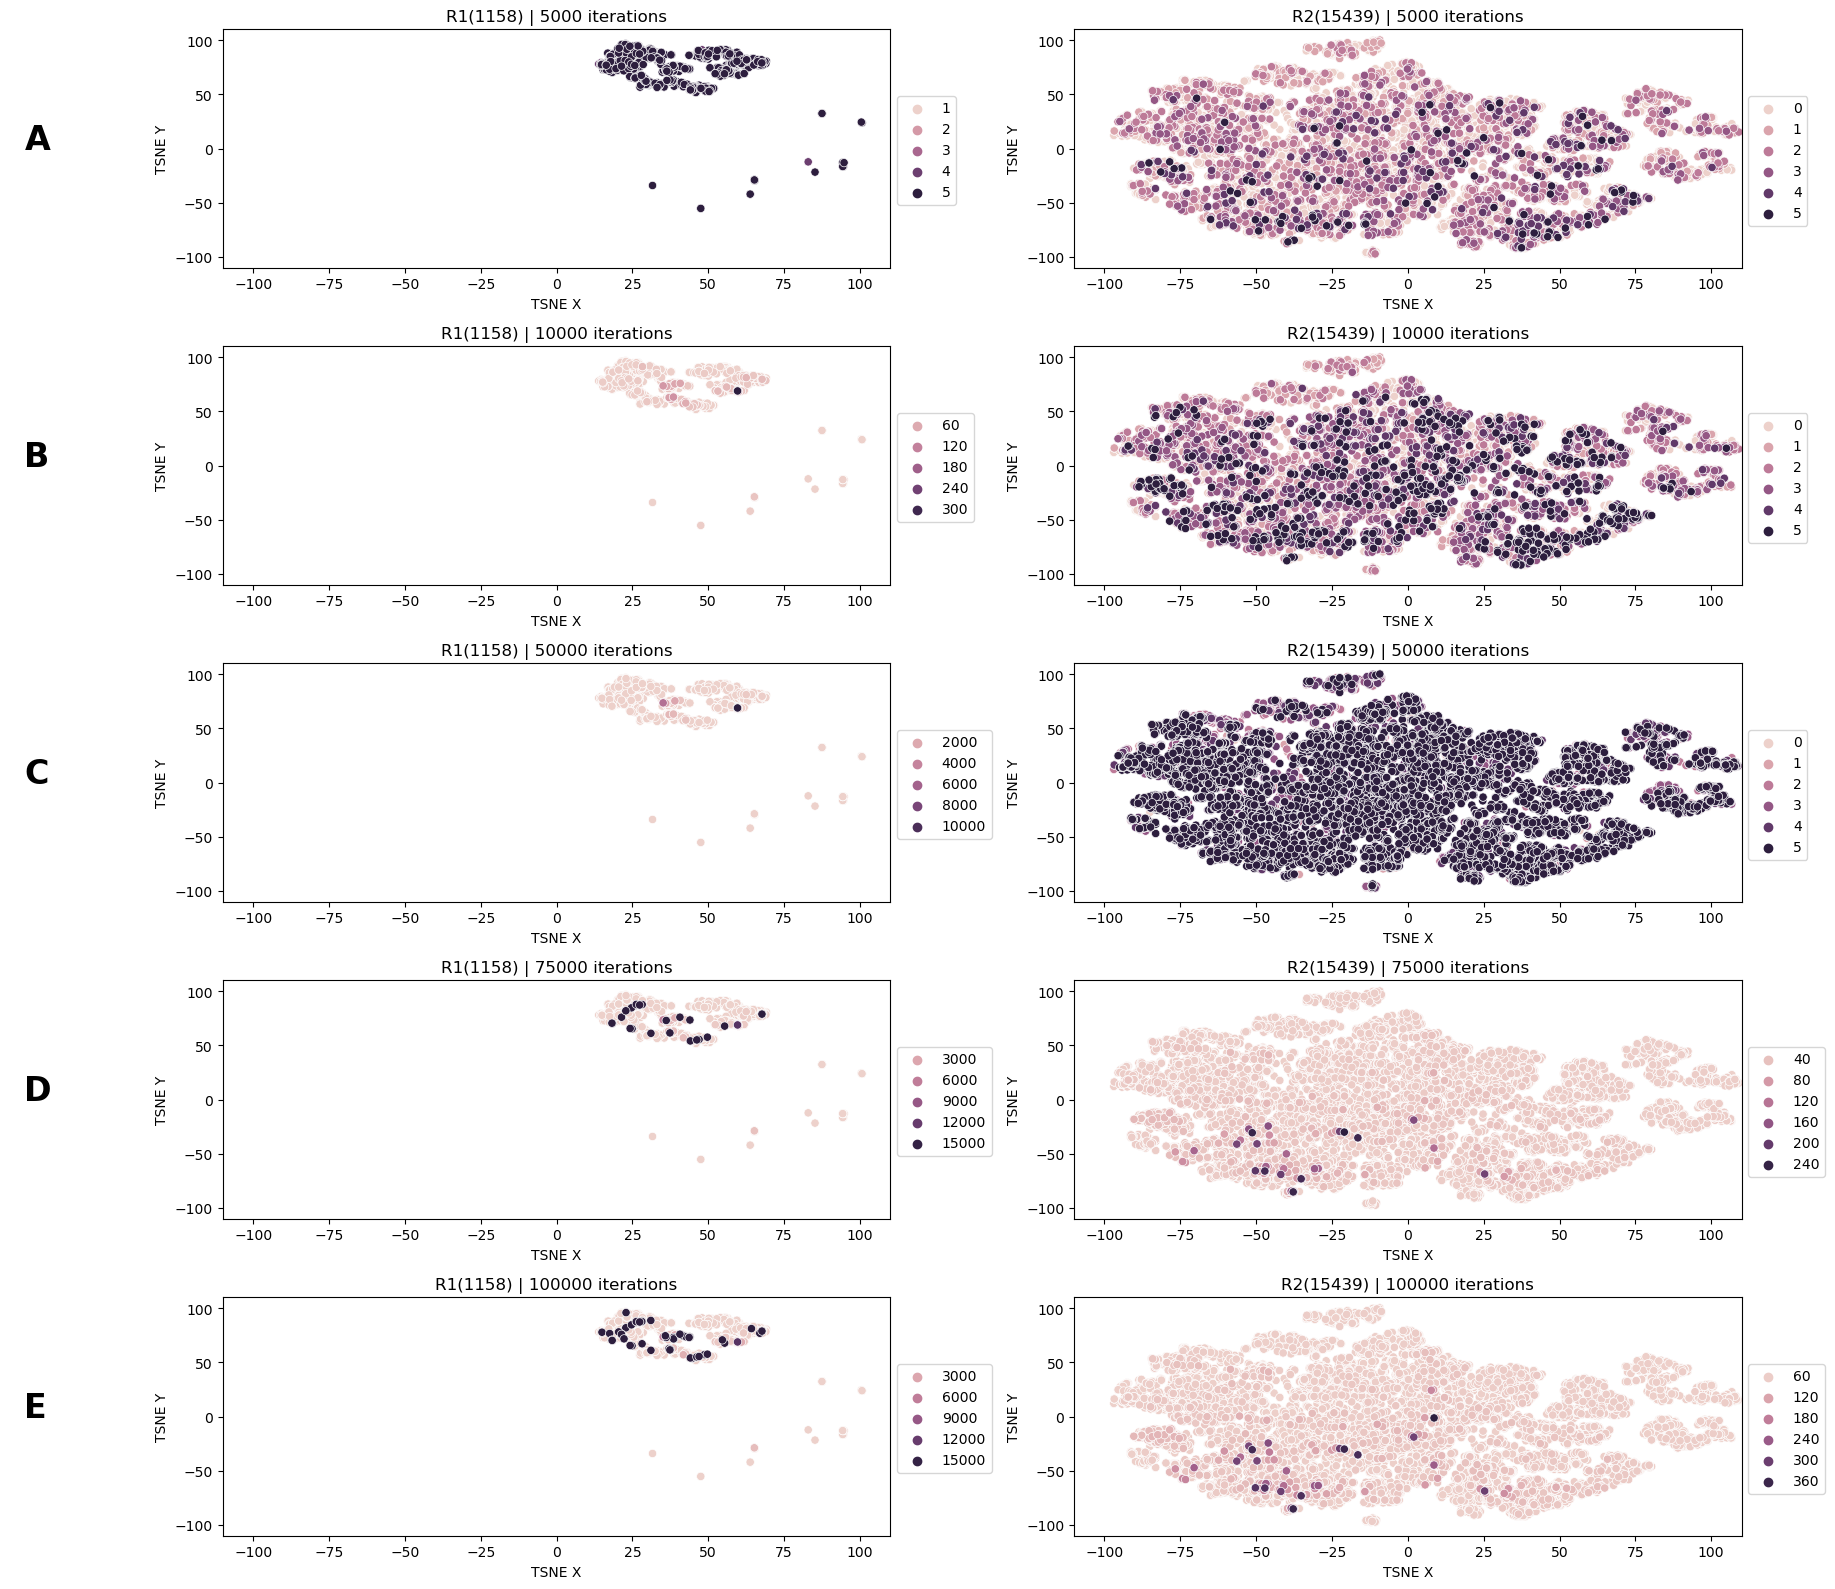

In [4]:
plt.figure(figsize=(24,16))
num_cols = 12
start_col = [1,5]
row_labels = string.ascii_uppercase[0:8]
r_label = ["R1","R2"]
counts = [1158, 15439]
intervals = [5000,10000,50000,75000,100000]
num_rows = len(intervals)
for row_idx,num_sampled in enumerate(intervals):
    plot1 = plt.subplot2grid((num_rows, num_cols), (row_idx, 0), colspan=1)
    plot1.set_axis_off()
    plot1.text(0.5,0.5,row_labels[row_idx],weight="bold",fontsize=24)
    for cycle in [0,1]:
        c0_df = combo_df.query("total_scored == @num_sampled and cycle == @cycle")
        plot2 = plt.subplot2grid((num_rows, num_cols), (row_idx, start_col[cycle]), colspan=4)
        a = sns.scatterplot(x="tsne_x", y="tsne_y", 
                             data=c0_df.sort_values("synthon_count",ascending=True),
                             hue="synthon_count",sizes="synthon_count",ax=plot2,legend=True)
        a.set_title(f"{r_label[cycle]}({counts[cycle]}) | {num_sampled} iterations")
        a.set_xlim(-110,110)
        a.set_ylim(-110,110)
        a.set_xlabel("TSNE X")
        a.set_ylabel("TSNE Y")
        a.legend(loc='upper left', bbox_to_anchor=(1.00, 0.75), ncol=1);
plt.tight_layout()        